# Working on TITANIC DATASET

## Task in hand : 
### downloading the dataset and using the best model to prediction 


### First things first
1. Downloading the dataset from the link 
2. Doing some EDA 

In [1]:
import os 
import requests
from urllib.request import urlretrieve
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,classification_report
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

### Downloading the dataset 

In [2]:
FILEPATH = os.path.join(os.getcwd(),"titanic")
DOWNLOAD_URL = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/titanic"

def fetch_data(path = FILEPATH, downloadurl = DOWNLOAD_URL):
    if not os.path.isdir(path):
        os.makedirs(path)
    for filename in ("test.csv","train.csv"):
        filepath = os.path.join(path,filename)
        if not os.path.isfile(filepath):
            urlretrieve(downloadurl+"/"+filename,filepath)

fetch_data()

In [3]:
def fetch_csv_data(FILENAME: str, FILEPATH=FILEPATH):
    csv_file = os.path.join(FILEPATH,FILENAME)
    return pd.read_csv(csv_file)

train_data = fetch_csv_data("train.csv")
test_data = fetch_csv_data("test.csv")

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data = train_data.set_index("PassengerId")
test_data = test_data.set_index("PassengerId")

In [6]:
test_data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


## EDA 

The attributes have the following meaning:

    PassengerId: a unique identifier for each passenger
    Survived: that's the target, 0 means the passenger did not survive, while 1 means he/she survived.
    Pclass: passenger class.
    Name, Sex, Age: self-explanatory
    SibSp: how many siblings & spouses of the passenger aboard the Titanic.
    Parch: how many children & parents of the passenger aboard the Titanic.
    Ticket: ticket id
    Fare: price paid (in pounds)
    Cabin: passenger's cabin number
    Embarked: where the passenger embarked the Titanic

In [7]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699113,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526507,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.416700,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [11]:
train_data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [12]:
train_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [13]:
train_data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [14]:
train_data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
train_data["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

## Creating a Pipeline

In [16]:
transform_pipeline = Pipeline([
    ("imputer",SimpleImputer(strategy="median")),
    ("scaler",StandardScaler())
])

In [17]:
encode_pipeline = Pipeline([
    ("imputer",SimpleImputer(strategy="most_frequent")),
    ("encoder",OneHotEncoder(sparse=False))
])

In [18]:
full_pipeline = ColumnTransformer([
    ("num_transformer",transform_pipeline,["Age", "SibSp", "Parch", "Fare"]),
    ("text_transformer",encode_pipeline,["Pclass", "Sex", "Embarked"])
],remainder="drop")

In [19]:
train_data_copy = train_data.copy()
train_data_copy = train_data_copy.drop("Survived",axis=1)


train_data_encoded = full_pipeline.fit_transform(train_data_copy)
train_data_encoded[0]

array([-0.56573582,  0.43279337, -0.47367361, -0.50244517,  0.        ,
        0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  1.        ])

In [20]:
y_train = train_data["Survived"]

### Using Random Forest Model and SVC models, comparing the result

In [21]:
forest_model = RandomForestClassifier(random_state=42)

cv_scores = cross_val_score(forest_model,train_data_encoded,y_train,cv=10)

cv_scores.mean()

0.8137578027465668

In [22]:
forest_model.fit(train_data_encoded,y_train)
X_test = full_pipeline.transform(test_data)

y_pred = forest_model.predict(X_test)

In [23]:
svc_model = SVC(gamma="auto")
svc_scores = cross_val_score(svc_model,train_data_encoded,y_train,cv=10)
svc_scores.mean()

0.8249313358302123

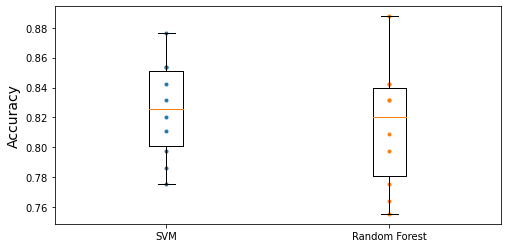

In [24]:
plt.figure(figsize=(8, 4))
plt.plot([1]*len(cv_scores), svc_scores, ".")
plt.plot([2]*len(svc_scores), cv_scores, ".")
plt.boxplot([svc_scores, cv_scores], labels=("SVM","Random Forest"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()